In [1]:
try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)


`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.7.0


In [2]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
from google.colab import files


In [3]:
uploaded = files.upload()
df_traffic = pd.read_csv(io.BytesIO(uploaded['traffic.csv']))
df_traffic.shape


Saving traffic.csv to traffic.csv


(200000, 4)

In [4]:
df_traffic.isnull().sum()
## No Null values
df_traffic.head(21)
# It's a sequence of length 10.

,sequence_no,sample_id,traffic,target
0,0.0,0.0,0.088819,0.0
1,1.0,0.0,0.480121,0.0
2,2.0,0.0,0.560106,0.0
3,3.0,0.0,0.341833,0.0
4,4.0,0.0,0.317495,0.0
5,5.0,0.0,0.544496,0.0
6,6.0,0.0,0.414178,0.0
7,7.0,0.0,0.386035,0.0
8,8.0,0.0,0.037407,0.0
9,9.0,0.0,0.020645,0.0


In [5]:
(df_traffic.groupby('sample_id').target.nunique('target')>1).sum()
df_traffic.target.unique()

array([0., 1., 2., 3.])

In [6]:
## Creating a dataframe with sequence length of 10 with 10 targets
X=[]
T=10
y=[]
for i in np.arange(0,df_traffic.shape[0],10) :
  X.append(df_traffic.traffic[i:i+T])
  y.append(df_traffic.target[i:i+T].mean())
X=np.array(X).reshape(-1,T)
y=np.array(y)
print("X.shape", X.shape, "Y.shape", y.shape)



X.shape (20000, 10) Y.shape (20000,)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
### Now try RNN/LSTM model
D=1   # As we have only 1 feature as "traffic"
X = X.reshape(-1, T, 1) # make it N x T x D
N=20000
T=10
# make the RNN
i = Input(shape=(T, D))
x = LSTM(50)(i)
x = Dense(4, activation='softmax')(x)
model = Model(i, x)
model.compile(
 loss='sparse_categorical_crossentropy',
# loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy']
)

# train the RNN
r = model.fit(
  X_train,y_train,
  batch_size=150,
  epochs=50,
  validation_data=(X_test,y_test),
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
94/94 [==============================] - 3s 14ms/step - loss: 0.8166 - accuracy: 0.6322 - val_loss: 0.6038 - val_accuracy: 0.7335
Epoch 2/50
94/94 [==============================] - 1s 10ms/step - loss: 0.4742 - accuracy: 0.7961 - val_loss: 0.3739 - val_accuracy: 0.8495
Epoch 3/50
94/94 [==============================] - 1s 10ms/step - loss: 0.3458 - accuracy: 0.8653 - val_loss: 0.2556 - val_accuracy: 0.9017
Epoch 4/50
94/94 [==============================] - 1s 10ms/step - loss: 0.2635 - accuracy: 0.8979 - val_loss: 0.2378 - val_accuracy: 0.9108
Epoch 5/50
94/94 [==============================] - 1s 10ms/step - loss: 0.2339 - accuracy: 0.9131 - val_loss: 0.1958 - val_accuracy: 0.9273
Epoch 6/50
94/94 [==============================] - 1s 10ms/step - loss: 0.1917 - accuracy: 0.9312 - val_loss: 0.1934 - val_accuracy: 0.9287
Epoch 7/50
94/94 [==============================] - 1s 11ms/step - loss: 0.1759 - accuracy: 0.9368 - val_loss: 0.1487 - val_accuracy: 0.9443
Epoch 8/50
94

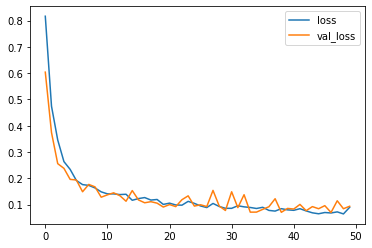

In [22]:
# plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

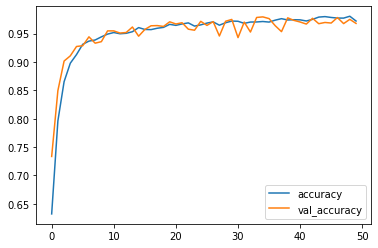

In [23]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
predictions = model.predict(X_test)

#  print('Accuracy of  Neural Network Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
#  print(confusion_matrix(y_test,predictions))
#  print(classification_report(y_test,predictions))

In [25]:
y_hat=[]
for pred in predictions:
  y_hat.append(pred.argmax())
  
print('Accuracy of  Neural Network Classifier on test set: {:.2f}'.format(metrics.accuracy_score(y_test,y_hat) ))
print(confusion_matrix(y_test,y_hat))
print(classification_report(y_test,y_hat))

Accuracy of  Neural Network Classifier on test set: 0.97
[[1471   14    0    0]
 [  35 1441   55    1]
 [   0   30 1428   53]
 [   0    0    4 1468]]
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      1485
         1.0       0.97      0.94      0.96      1532
         2.0       0.96      0.95      0.95      1511
         3.0       0.96      1.00      0.98      1472

    accuracy                           0.97      6000
   macro avg       0.97      0.97      0.97      6000
weighted avg       0.97      0.97      0.97      6000



In [13]:
### Defining a function to find the best parameters for LSTM
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    learning_rate_list=[0.05,0.1]
    hidden_unit_list=[50]
    batch_size_list=[200]
    epoch_list  =   [75,100]
    
    print(X_train.shape,X_test.shape)
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            for lr_trial in learning_rate_list:
                for hidden_unit_trial in hidden_unit_list:
                    TrialNumber+=1
        
                    # make the RNN
                    i = Input(shape=(T, D))
                    x = LSTM(hidden_unit_trial)(i)
                    x = Dense(4, activation='softmax')(x)
                    model = Model(i, x)
                    model.compile(
                    loss='sparse_categorical_crossentropy',
                    # loss='binary_crossentropy',
                    optimizer=Adam(lr=lr_trial),
                      metrics=['accuracy']
                    )

                  # train the RNN
                    r = model.fit(
                    X_train,y_train,
                    batch_size=batch_size_trial,
                    epochs=epochs_trial
                    )
                    predictions = model.predict(X_test)
                    y_hat=[]
                    for pred in predictions:
                      y_hat.append(pred.argmax())


                    print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, \
                      'LR_unit:',lr_trial,'Hidden_Unit:',hidden_unit_trial,'Accuracy:',metrics.accuracy_score(y_test,y_hat) )
            
                SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial),metrics.accuracy_score(y_test,y_hat) ]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)
 


In [14]:
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

(14000, 10) (6000, 10)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/75
70/70 [==============================] - 2s 9ms/step - loss: 0.8660 - accuracy: 0.6153
Epoch 2/75
70/70 [==============================] - 1s 9ms/step - loss: 0.3965 - accuracy: 0.8470
Epoch 3/75
70/70 [==============================] - 1s 9ms/step - loss: 0.2386 - accuracy: 0.9132
Epoch 4/75
70/70 [==============================] - 1s 9ms/step - loss: 0.2039 - accuracy: 0.9277
Epoch 5/75
70/70 [==============================] - 1s 9ms/step - loss: 0.1663 - accuracy: 0.9436
Epoch 6/75
70/70 [==============================] - 1s 9ms/step - loss: 0.1495 - accuracy: 0.9476
Epoch 7/75
70/70 [==============================] - 1s 9ms/step - loss: 0.1318 - accuracy: 0.9549
Epoch 8/75
70/70 [==============================] - 1s 9ms/step - loss: 0.1440 - accuracy: 0.9525
Epoch 9/75
70/70 [==============================] - 1s 9ms/step - loss: 0.1248 - accuracy: 0.9581
Epoch 10/75
70/70 [==============================] - 1s 9ms/step - loss: 0.1113 - accuracy: 0.9639
Epoch 11/75
70/70 [

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/75
70/70 [==============================] - 2s 8ms/step - loss: 1.0556 - accuracy: 0.5239
Epoch 2/75
70/70 [==============================] - 1s 9ms/step - loss: 0.5720 - accuracy: 0.7471
Epoch 3/75
70/70 [==============================] - 1s 9ms/step - loss: 0.4317 - accuracy: 0.8209
Epoch 4/75
70/70 [==============================] - 1s 9ms/step - loss: 0.2750 - accuracy: 0.8943
Epoch 5/75
70/70 [==============================] - 1s 9ms/step - loss: 0.2635 - accuracy: 0.9007
Epoch 6/75
70/70 [==============================] - 1s 9ms/step - loss: 0.2161 - accuracy: 0.9193
Epoch 7/75
70/70 [==============================] - 1s 9ms/step - loss: 0.1795 - accuracy: 0.9344
Epoch 8/75
70/70 [==============================] - 1s 9ms/step - loss: 0.1713 - accuracy: 0.9395
Epoch 9/75
70/70 [==============================] - 1s 9ms/step - loss: 0.1676 - accuracy: 0.9424
Epoch 10/75
70/70 [==============================] - 1s 9ms/step - loss: 0.1578 - accuracy: 0.9441
Epoch 11/75
70/70 [

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
70/70 [==============================] - 2s 8ms/step - loss: 0.7612 - accuracy: 0.6579
Epoch 2/100
70/70 [==============================] - 1s 9ms/step - loss: 0.2868 - accuracy: 0.8911
Epoch 3/100
70/70 [==============================] - 1s 9ms/step - loss: 0.2249 - accuracy: 0.9183
Epoch 4/100
70/70 [==============================] - 1s 8ms/step - loss: 0.2054 - accuracy: 0.9270
Epoch 5/100
70/70 [==============================] - 1s 9ms/step - loss: 0.1886 - accuracy: 0.9307
Epoch 6/100
70/70 [==============================] - 1s 9ms/step - loss: 0.1353 - accuracy: 0.9534
Epoch 7/100
70/70 [==============================] - 1s 10ms/step - loss: 0.1503 - accuracy: 0.9491
Epoch 8/100
70/70 [==============================] - 1s 9ms/step - loss: 0.1207 - accuracy: 0.9587
Epoch 9/100
70/70 [==============================] - 1s 8ms/step - loss: 0.1259 - accuracy: 0.9569
Epoch 10/100
70/70 [==============================] - 1s 9ms/step - loss: 0.1175 - accuracy: 0.9604
Epoch 11

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
70/70 [==============================] - 2s 9ms/step - loss: 1.4608 - accuracy: 0.2463
Epoch 2/100
70/70 [==============================] - 1s 8ms/step - loss: 1.1431 - accuracy: 0.4568
Epoch 3/100
70/70 [==============================] - 1s 9ms/step - loss: 0.8121 - accuracy: 0.6246
Epoch 4/100
70/70 [==============================] - 1s 9ms/step - loss: 0.7056 - accuracy: 0.6784
Epoch 5/100
70/70 [==============================] - 1s 9ms/step - loss: 0.6436 - accuracy: 0.7206
Epoch 6/100
70/70 [==============================] - 1s 9ms/step - loss: 0.5072 - accuracy: 0.7964
Epoch 7/100
70/70 [==============================] - 1s 9ms/step - loss: 0.3365 - accuracy: 0.8729
Epoch 8/100
70/70 [==============================] - 1s 9ms/step - loss: 0.3432 - accuracy: 0.8779
Epoch 9/100
70/70 [==============================] - 1s 10ms/step - loss: 0.2694 - accuracy: 0.9071
Epoch 10/100
70/70 [==============================] - 1s 10ms/step - loss: 0.2272 - accuracy: 0.9229
Epoch 1

In [19]:
### With Best Hyperparametrs RNN/LSTM model
D=1   # As we have only 1 feature as "traffic"
X = X.reshape(-1, T, 1) # make it N x T x D
N=20000
T=10
# make the RNN
i = Input(shape=(T, D))
x = LSTM(50)(i)
x = Dense(4, activation='softmax')(x)
model = Model(i, x)
model.compile(
 loss='sparse_categorical_crossentropy',
# loss='binary_crossentropy',
  optimizer=Adam(lr=0.05),
  metrics=['accuracy']
)

# train the RNN
r = model.fit(
  X_train,y_train,
  batch_size=300,
  epochs=100,
  validation_data=(X_test,y_test),
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
47/47 [==============================] - 3s 37ms/step - loss: 1.0663 - accuracy: 0.5184 - val_loss: 0.5976 - val_accuracy: 0.7518
Epoch 2/100
47/47 [==============================] - 1s 19ms/step - loss: 0.4469 - accuracy: 0.8246 - val_loss: 0.2807 - val_accuracy: 0.9023
Epoch 3/100
47/47 [==============================] - 1s 19ms/step - loss: 0.2595 - accuracy: 0.9051 - val_loss: 0.1677 - val_accuracy: 0.9398
Epoch 4/100
47/47 [==============================] - 1s 18ms/step - loss: 0.1868 - accuracy: 0.9314 - val_loss: 0.2195 - val_accuracy: 0.9157
Epoch 5/100
47/47 [==============================] - 1s 19ms/step - loss: 0.1749 - accuracy: 0.9374 - val_loss: 0.1398 - val_accuracy: 0.9563
Epoch 6/100
47/47 [==============================] - 1s 19ms/step - loss: 0.1390 - accuracy: 0.9519 - val_loss: 0.1289 - val_accuracy: 0.9627
Epoch 7/100
47/47 [==============================] - 1s 19ms/step - loss: 0.1495 - accuracy: 0.9479 - val_loss: 0.1448 - val_accuracy: 0.9465
Epoch 

In [20]:
y_hat=[]
for pred in predictions:
  y_hat.append(pred.argmax())
  
print('Accuracy of  Neural Network Classifier on test set: {:.2f}'.format(metrics.accuracy_score(y_test,y_hat) ))
print(confusion_matrix(y_test,y_hat))
print(classification_report(y_test,y_hat))

Accuracy of  Neural Network Classifier on test set: 0.98
[[1484    1    0    0]
 [  28 1501    3    0]
 [   0   53 1422   36]
 [   0    0   16 1456]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1485
         1.0       0.97      0.98      0.97      1532
         2.0       0.99      0.94      0.96      1511
         3.0       0.98      0.99      0.98      1472

    accuracy                           0.98      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.98      0.98      0.98      6000

